In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
random.seed(0) 
np.random.seed(0)
V = 4039
T = 1000*V
InitNode = 0

In [3]:
nodes = list(range(V)) # Get a list of only the node names
edges = np.loadtxt('facebook_combined.txt',dtype=int)

In [4]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


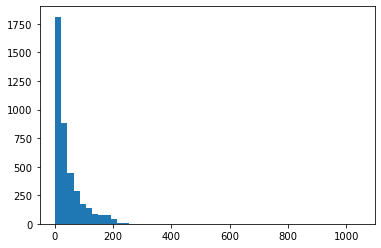

In [5]:
print(nx.info(G))
z = list(G.degree([n for n in G]))
y = [y[1] for y in z]
b = np.linspace(0,max(y))
plt.hist(y,bins=b)
plt.show()

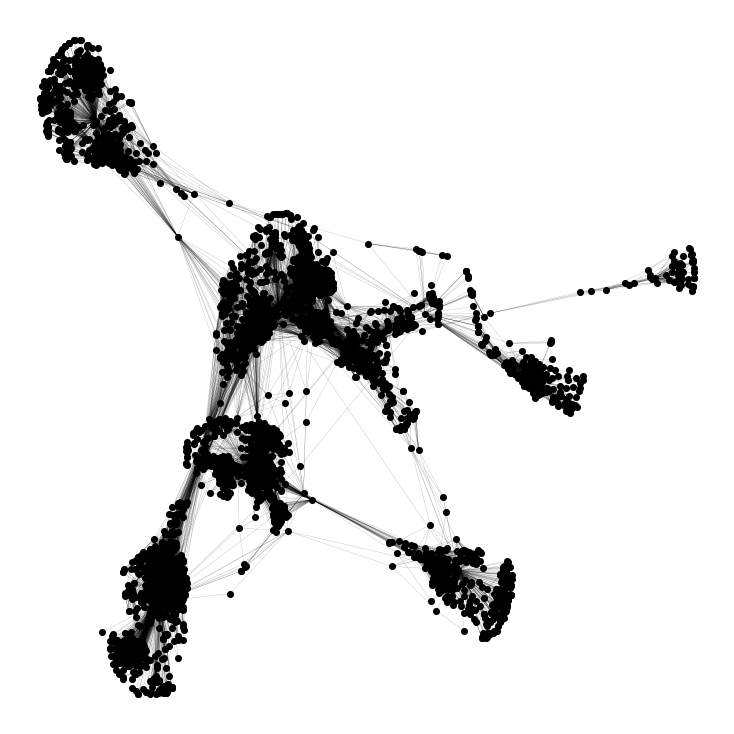

In [6]:
options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
plt.figure(1,figsize=(10,10)) 
pos = nx.spring_layout(G)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [7]:
nx.set_edge_attributes(G, 0,'visits')
H = G.to_directed()
nx.set_node_attributes(G, 0,'visits')

In [8]:
pi = np.array([x[1] for x in list(G.degree())])
pi = pi/np.sum(pi)

In [9]:
t = 0
v = InitNode
freq = np.empty(V)
err = []
ferr = []

while t < T:
    v_next = random.choice(list(H.adj[v]))
    H[v][v_next]['visits'] += 1
    G.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq[i] = G.nodes[i]['visits']
        pi_hat = freq/np.sum(freq)
        err.append(np.mean(abs(pi-pi_hat)))
        ferr.append(np.mean(abs(pi-pi_hat)/pi))

In [10]:
print('Avg visits per directed edge expected : {:.2f}'.format(0.5 * T/len(list(G.edges()))))

Avg visits per directed edge expected : 22.89


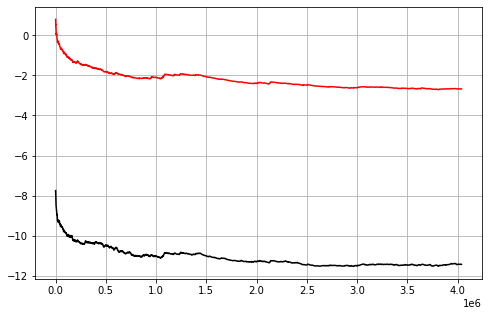

In [11]:
plt.figure(2,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(err),color='black')
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(ferr),color='red')
plt.grid()

In [13]:
n_conduct = nx.algorithms.centrality.approximate_current_flow_betweenness_centrality(G)
print("Done Node Approx Current Betweenness Centrality")

vr = nx.algorithms.centrality.voterank(G)
print("Done Node VoteRank")

Done Node Approx Current Betweenness Centrality
Done Node VoteRank


In [16]:
n_conduct = [n_conduct[x] for x in range(V)] 

In [21]:
def argsort(seq):
    return [x for x,y in sorted(enumerate(seq), key = lambda x: -x[1])]
print(argsort(n_conduct))

[107, 1085, 1684, 1718, 3437, 698, 567, 136, 1405, 0, 1912, 1505, 1577, 1465, 348, 1666, 1656, 171, 1534, 862, 483, 1642, 857, 1758, 428, 1419, 1171, 594, 563, 1726, 414, 3263, 990, 1450, 526, 1553, 58, 1165, 3556, 1687, 1086, 1369, 860, 1847, 1098, 3980, 1593, 1317, 637, 3521, 484, 173, 1361, 1537, 1555, 3495, 3861, 3830, 3454, 1360, 3677, 1678, 1702, 198, 3797, 3456, 353, 1674, 3487, 3684, 1077, 1806, 1193, 1173, 3117, 1549, 606, 119, 1136, 3723, 1202, 3674, 376, 3526, 651, 1420, 908, 3961, 3633, 1825, 4027, 3851, 1274, 363, 2946, 1866, 475, 1074, 1511, 1178, 3442, 1029, 3577, 1494, 1567, 3948, 1561, 1327, 2764, 2543, 1328, 538, 366, 580, 3756, 871, 1334, 517, 1337, 3592, 1584, 2047, 1483, 3604, 3501, 951, 856, 1803, 3872, 1518, 1307, 1540, 1088, 3877, 868, 865, 3705, 3609, 2347, 3525, 1835, 3019, 1283, 2813, 1588, 1705, 3692, 1421, 1964, 1827, 1187, 3721, 3750, 1618, 2883, 566, 3962, 973, 4031, 3610, 3540, 1719, 686, 373, 3550, 3586, 1487, 1410, 1858, 1620, 3740, 3278, 2677, 1883, 1

In [53]:
G[0][567]

KeyError: 567

In [17]:
vr

[107,
 1684,
 1912,
 3437,
 0,
 2543,
 2347,
 1888,
 1800,
 348,
 483,
 2266,
 1663,
 1352,
 1941,
 1730,
 1985,
 2233,
 1431,
 2047,
 2142,
 1199,
 1584,
 2206,
 686,
 1768,
 2384,
 2611,
 1086,
 2111,
 2410,
 1589,
 414,
 2229,
 1827,
 2218,
 2199,
 1746,
 2078,
 2081,
 1126,
 2123,
 2839,
 1577,
 1804,
 1993,
 2133,
 1390,
 2560,
 2328,
 3363,
 1377,
 376,
 917,
 2507,
 2289,
 896,
 3101,
 1612,
 2007,
 1983,
 3291,
 1277,
 1559,
 2054,
 2754,
 2464,
 475,
 1707,
 1783,
 2598,
 2742,
 2240,
 1835,
 3830,
 3082,
 2283,
 1833,
 2309,
 3426,
 3397,
 428,
 2333,
 1621,
 3320,
 637,
 2244,
 3090,
 136,
 1104,
 1714,
 1718,
 2602,
 2951,
 2966,
 1610,
 1235,
 3280,
 2282,
 484,
 2088,
 2944,
 1078,
 1204,
 3434,
 2117,
 517,
 1622,
 2526,
 3232,
 1472,
 1459,
 2863,
 2087,
 412,
 1376,
 3596,
 2786,
 2730,
 2131,
 2877,
 353,
 1613,
 3116,
 3938,
 2268,
 828,
 2542,
 1014,
 563,
 1391,
 2986,
 3051,
 2313,
 56,
 1591,
 3545,
 3154,
 366,
 2590,
 2336,
 925,
 2719,
 1583,
 3387,
 67,
 363,

In [43]:
Gf = nx.Graph()
Gf.add_nodes_from(nodes)
Gf.add_edges_from(edges)

In [44]:
nx.set_edge_attributes(Gf, 0,'visits')
Hf = Gf.to_directed()
nx.set_node_attributes(Gf, 0,'visits')

In [45]:
## 107  & 1912
## 3437 & 1684
## 107 & 3437
## 698 & 1864
## 0 & 567
elist = [(107,1912),(1912,107),(3437,1684),(1684,3437),(107,3437),(3437,107),(698,1864),(1864,698),(0,567),(567,0)]
Hf.add_edges_from(elist,visits=0)

In [46]:
t = 0
v = InitNode
freq_acc = np.zeros(V)
err_acc = []
ferr_acc = []

while t < T:
    v_next = random.choice(list(Hf.adj[v]))
    Hf[v][v_next]['visits'] += 1
    if (v,v_next) not in elist:
        Gf.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq_acc[i] = Gf.nodes[i]['visits']
        pi_hat_acc = freq_acc/np.sum(freq_acc)
        err_acc.append(np.mean(abs(pi-pi_hat_acc)))
        ferr_acc.append(np.mean(abs(pi-pi_hat_acc)/pi))

In [47]:
print(sum([G.nodes[i]['visits'] for i in range(V)]))
print(sum([Gf.nodes[i]['visits'] for i in range(V)]))

4039000
4038764


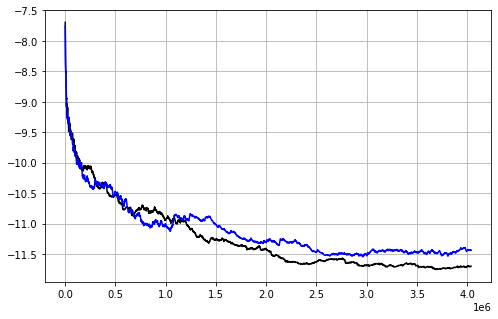

In [52]:
plt.figure(3,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(err_acc),color='black')
#plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(ferr_acc),color='red')
plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(err),color='blue')
#plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(ferr),color='green')
plt.grid()

In [49]:
err

[0.0004299069407726241,
 0.0003936730133234205,
 0.0003707907516818624,
 0.00035852396973279333,
 0.00034812827282825083,
 0.0003410571058910731,
 0.0002984391669157793,
 0.00027975368749249196,
 0.00024875963406217216,
 0.00022925043153739982,
 0.00021347020849742094,
 0.00020385307789962484,
 0.00019831934698353392,
 0.00019504911162322635,
 0.00018691026834154187,
 0.00017523562660592945,
 0.00017564029031217813,
 0.00017183013289684057,
 0.0001711175049816989,
 0.00016986660141560513,
 0.00016740194264572587,
 0.00016193701526691598,
 0.00015992129018726115,
 0.0001571446400001599,
 0.00015719405503683383,
 0.00015271109882656229,
 0.0001531670927801479,
 0.000152239930191589,
 0.0001427728645627607,
 0.00013502773657667513,
 0.0001312723908866612,
 0.00012862565602852463,
 0.00012901588399957074,
 0.000128985700810315,
 0.00013089132064347537,
 0.00013147919321227676,
 0.00012729664878135296,
 0.00012393692415995207,
 0.00012308410414782302,
 0.00012300453726074836,
 0.00012203409

In [50]:
err_acc

[0.0004551414447401991,
 0.00038253064315884537,
 0.000346847548996816,
 0.00032791081308446477,
 0.0002737068889255461,
 0.00027329080893959834,
 0.00023907720621407083,
 0.00022770586373246243,
 0.00022331385107538795,
 0.0002171191975793484,
 0.00021102973522250777,
 0.0002109502681423371,
 0.00020573133575507656,
 0.0002004862291093764,
 0.00020164920814964399,
 0.0002036835639988992,
 0.0002016505740090701,
 0.00019897359206491757,
 0.00019362333864799842,
 0.0001753749588893086,
 0.00015972489012693744,
 0.0001490735317191812,
 0.00014684028097747162,
 0.00014113530082927715,
 0.00013284629063309506,
 0.00012695550977150324,
 0.00012321250770289254,
 0.00012033758962096495,
 0.00011580999409322534,
 0.00011479069320695362,
 0.0001132075294906576,
 0.00011348460219966871,
 0.00011799616263332963,
 0.00012068596557311136,
 0.0001185334471118381,
 0.00011797518478368406,
 0.0001173885721602086,
 0.00011655517277079824,
 0.00011738587269489812,
 0.00011270643332221577,
 0.00010864619